Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Mais informações: https://ciia-saude.medicina.ufmg.br/

# **Estatística Descritiva (Medidas resumo, tabelas de frequência e gráficos)**

In [1]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

import scipy.stats as stats

# Abrir o arquivo da Base de Dados

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS.xlsx'

# Ler o arquivo
dados = pd.read_excel(arquivo)
dados

,Unnamed: 0,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,...,IG_TERMO,HOUVE_CESAREA,HOUVE_LACERACAO,HOUVE_CM,PARIDADE,PESO_VIAVEIS,PESO_US,PESO_ALTA,BAIXO_APGAR5,PARTO_CESAREO
0,0,2014-01-20,2014-01-21,1,2,1.0,38.0,38.0,Sim,Parto Normal,...,Termo-precoce,Não,Não,Sim,Primípara,3590.0,2590.0,3440.0,Não,Não
1,1,2014-05-21,2014-05-22,1,1,0.0,36.0,36.0,Sim,Parto Normal,...,Prematuro,Não,Não,Não,Nulípara,2660.0,1660.0,2510.0,Não,Não
2,2,2014-04-13,2014-04-14,1,2,1.0,39.0,39.0,Não,Parto Normal,...,Termo,Sim,Sim,Sim,Primípara,3075.0,2075.0,2925.0,Não,Não
3,3,2013-12-04,2013-12-05,1,2,1.0,41.0,41.0,Não,Parto Normal,...,Termo,Não,Sim,Sim,Primípara,3505.0,2755.5,3355.0,Não,Não
4,4,2013-12-05,2013-12-06,1,1,0.0,36.0,36.0,Não,Parto Normal,...,Prematuro,Não,Não,Sim,Nulípara,3405.0,2405.0,3255.0,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,1703,2014-07-05,2014-08-12,38,2,1.0,38.0,38.0,Não,Parto Normal,...,Termo-precoce,Não,Sim,Sim,Primípara,2940.0,1940.0,2790.0,Não,Não
1704,1704,2014-04-25,2014-06-10,46,2,1.0,29.0,34.0,Sim,Parto Cesáreo,...,Prematuro,Não,Não,Sim,Primípara,1945.0,661.5,1795.0,Não,Sim
1705,1705,2013-11-04,2013-12-22,48,2,1.0,26.0,32.0,Sim,Parto Cesáreo,...,Prematuro,Não,Não,Sim,Primípara,2275.0,892.5,2125.0,Não,Sim
1706,1706,2013-10-04,2013-11-28,55,3,0.0,27.0,34.0,Sim,Parto Cesáreo,...,Prematuro,Não,Não,Sim,Nulípara,2590.0,1113.0,2440.0,Não,Sim


In [3]:
# informações sobre as variáveis/colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1708 non-null   int64         
 1   DT_INTERNACAO       1708 non-null   datetime64[ns]
 2   DT_ALTA             1708 non-null   datetime64[ns]
 3   DURACAO_INT         1708 non-null   int64         
 4   GESTACOES           1708 non-null   int64         
 5   PARTOS              1707 non-null   float64       
 6   IG_OBSTETRA         1686 non-null   float64       
 7   IG_PEDIATRA         1704 non-null   float64       
 8   ALTO_RISCO          1708 non-null   object        
 9   TIPO_PARTO          1708 non-null   object        
 10  HIPERTENSAO         1708 non-null   object        
 11  GEMELAR             1708 non-null   object        
 12  CESAREAS_PREVIAS    1701 non-null   float64       
 13  EPISIOTOMIA         1708 non-null   object      

# Variáveis categóricas - Tabelas de frequência

**Tabelas de frequência**

In [4]:
# Frequencia absolunta
dados.SEXO.value_counts()

,count
SEXO,
Masculino,853
Feminino,797


In [5]:
# Tabela de frequência (inclui os valores nulos)
dados.SEXO.value_counts(dropna=False)

,count
SEXO,
Masculino,853
Feminino,797
NaN,58


In [9]:
# Frequencia relativa
dados.SEXO.value_counts(normalize = True)

,proportion
SEXO,
Masculino,0.51697
Feminino,0.48303


In [10]:
# Frequencia relativa (em %)
dados.SEXO.value_counts(normalize = True)*100

,proportion
SEXO,
Masculino,51.69697
Feminino,48.30303


In [11]:
dados.TIPO_PARTO.value_counts()

,count
TIPO_PARTO,
Parto Normal,1056
Parto Cesáreo,652


In [12]:
# Guardar o resultado da tabela de Frequencia em uma variável

tabelaSexoRN = dados.SEXO.value_counts(normalize = True)*100
tabelaSexoRN

,proportion
SEXO,
Masculino,51.69697
Feminino,48.30303


In [14]:
# Frequencia relativa (em % com 3 casas decimais)

tabelaSexoRN.round(3)

,proportion
SEXO,
Masculino,51.697
Feminino,48.303


# Variáveis categóricas - Gráficos

<Axes: xlabel='SEXO'>

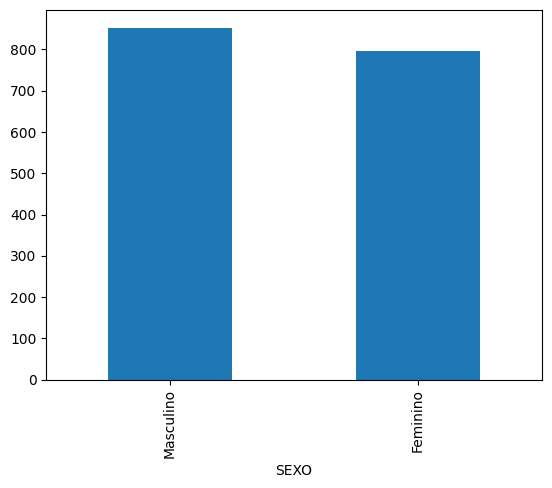

In [18]:
# Gráfico de colunas
dados.SEXO.value_counts().plot.bar()

<Axes: ylabel='SEXO'>

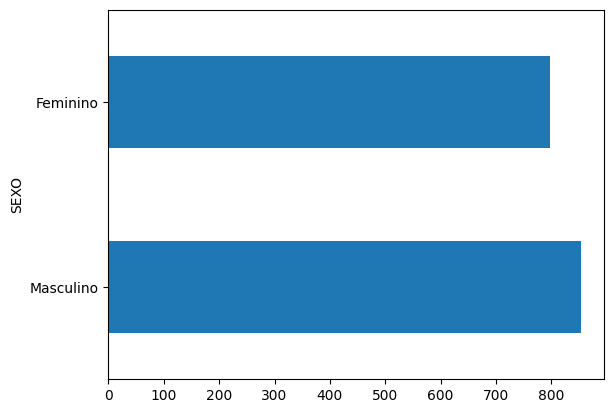

In [19]:
# Gráfico de barras horizontais
dados.SEXO.value_counts().plot.barh()

<Axes: ylabel='count'>

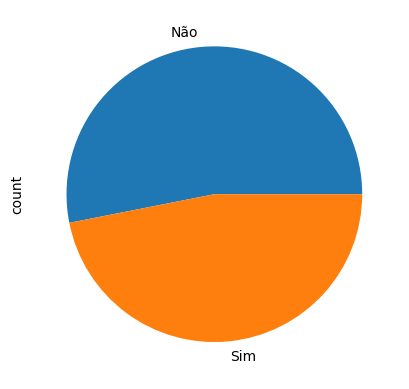

In [20]:
# Gráfico de pizza
dados.ALTO_RISCO.value_counts().plot.pie()

<Axes: ylabel='count'>

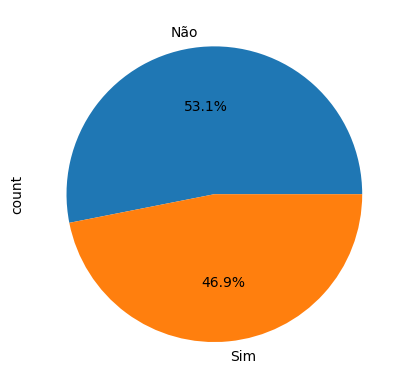

In [21]:
# '%1.1f%%'
# Gráfico de pizza - valores formatados
dados.ALTO_RISCO.value_counts().plot.pie(autopct='%1.1f%%')

# Variáveis numéricas - Medidas de resumo

In [15]:
# Criar uma tabela temporária com a contagem das 5 faixas
dados.PESO_NASCER.value_counts(bins=5)

,count
"(2412.0, 3483.0]",1104
"(3483.0, 4554.0]",324
"(1341.0, 2412.0]",184
"(264.644, 1341.0]",62
"(4554.0, 5625.0]",6


In [16]:
# Criar uma tabela temporária com a contagem das 5 faixas
tabela = dados.PESO_NASCER.value_counts(bins=5)

# Mostrar a tabela já ordenada pela sequência dos valores das faixas
tabela.sort_index()

,count
"(264.644, 1341.0]",62
"(1341.0, 2412.0]",184
"(2412.0, 3483.0]",1104
"(3483.0, 4554.0]",324
"(4554.0, 5625.0]",6


In [17]:
# Resumo descritivo de todas as colunas numéricas automaticamente
# Observação: variáveis que o Python reconheceu como númerica na importação, pode ser ajustado

dados.describe()

,Unnamed: 0,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,CESAREAS_PREVIAS,PESO_NASCER,APGAR1,APGAR5,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,LATITUDE,LONGITUDE,PESO_VIAVEIS,PESO_US,PESO_ALTA
count,1708.000000,1708,1708,1708.000000,1708.000000,1707.00000,1686.000000,1704.000000,1701.000000,1680.000000,1650.000000,1708.000000,853.000000,1708.000000,1680.000000,1708.000000,1708.000000,1640.000000,1595.000000,1680.000000
mean,853.500000,2014-03-16 06:03:22.341920256,2014-03-19 08:25:51.288056320,3.013466,2.175059,0.95372,37.901542,37.957746,0.262199,2977.958929,8.013333,8.852459,3082.961313,3078.450462,27.658929,-19.896304,-43.961571,3008.798171,2061.177241,2827.958929
min,0.000000,2013-09-27 00:00:00,2013-09-29 00:00:00,1.000000,1.000000,0.00000,19.000000,19.000000,0.000000,270.000000,0.000000,0.000000,410.000000,1990.000000,0.000000,-21.131405,-44.247436,350.000000,301.000000,120.000000
25%,426.750000,2013-12-16 00:00:00,2013-12-19 00:00:00,2.000000,1.000000,0.00000,37.000000,37.000000,0.000000,2710.000000,8.000000,9.000000,2785.000000,2830.000000,0.000000,-19.945029,-43.997208,2720.000000,1755.000000,2560.000000
50%,853.500000,2014-03-05 12:00:00,2014-03-08 00:00:00,2.000000,2.000000,1.00000,39.000000,39.000000,0.000000,3065.000000,9.000000,9.000000,3130.000000,3078.450462,1.000000,-19.896262,-43.964228,3075.000000,2095.000000,2915.000000
75%,1280.250000,2014-05-29 00:00:00,2014-06-02 06:00:00,3.000000,3.000000,1.00000,40.000000,40.000000,0.000000,3390.000000,9.000000,10.000000,3360.000000,3336.250000,9.000000,-19.841900,-43.923103,3400.000000,2438.250000,3240.000000
max,1707.000000,2014-10-31 00:00:00,2014-11-17 00:00:00,63.000000,17.000000,10.00000,42.000000,42.000000,5.000000,5625.000000,10.000000,10.000000,5290.000000,4125.000000,150.000000,-19.754097,-43.869659,5625.000000,3993.000000,5475.000000
std,493.201446,NaN,NaN,4.350403,1.449129,1.22674,3.181517,3.113337,0.600519,691.185194,1.862741,2.066671,626.188775,422.458113,47.796120,0.068632,0.046293,644.819536,611.016897,691.185194


In [22]:
# Medidas descritivas só de uma coluna
dados.PESO_NASCER.describe()

,PESO_NASCER
count,1680.000000
mean,2977.958929
std,691.185194
min,270.000000
25%,2710.000000
50%,3065.000000
75%,3390.000000
max,5625.000000


**Medidas de tendência central**

In [23]:
# Média
dados.PESO_NASCER.mean()

2977.9589285714287

In [24]:
# Mediana
dados.PESO_NASCER.median()

3065.0

In [25]:
# Moda
dados.PESO_NASCER.mode()

,PESO_NASCER
0,3200.0


**Medidas de dispersão dos dados**

In [26]:
# Desvio padrão
std = dados.PESO_NASCER.std()
std

691.1851937838775

In [27]:
# Mínimo
min = dados.PESO_NASCER.min()
min

270.0

In [28]:
# Máximo
max = dados.PESO_NASCER.max()
max

5625.0

In [29]:
# intervalo
intervalo = max - min
intervalo

5355.0

**Medidas de posição - Quantis/Percentis (0 - 100)**

In [30]:
# .quantile(0.1)
# percentil 10

dados.PESO_NASCER.quantile(0.1)

2190.0

In [31]:
# percentil 10
q10 = dados.PESO_NASCER.quantile(0.1)

# percentil 25 - 1º quartil
q25 = dados.PESO_NASCER.quantile(0.25)

# percentil 50 - mediana
q50 = dados.PESO_NASCER.quantile(0.5)

# percentil 75 - 3º quartil
q75 = dados.PESO_NASCER.quantile(0.75)

# percentil 90
q90 = dados.PESO_NASCER.quantile(0.9)

In [32]:
# Mostrar os percentis calculados
print(q10)
print(q25)
print(q50)
print(q75)
print(q90)

2190.0
2710.0
3065.0
3390.0
3725.500000000001


**Outras medidas: variância, erro padrão, curtose, assimetria**

In [33]:
# variância
# Variância é uma medida estatística que indica o quão dispersos estão os dados em relação à média.
# Quanto maior a variância, mais distantes os valores estão da média e mais dispersos os dados são.

dados.PESO_NASCER.var()

477736.97210605623

In [34]:
# Erro padrão da média
# O erro padrão da média (SEM) é uma medida que indica o quão precisamente a média de uma amostra representa a média real de uma população.
# Ele representa a variabilidade esperada entre as médias de diferentes amostras da mesma população.

dados.PESO_NASCER.sem()

16.863192025865832

In [35]:
# Curtose da distribuição - O achatamento da curva
# A distribuição normal possui uma curtose de 0,263

dados.PESO_NASCER.kurtosis()

2.535883231449158

In [36]:
# Assimetria da distribuição - Skewness
# |Skewness| < 0,15 = simétrica, entre 0,15 e 1,0 = assimetria moderada, e > 1 = assimetria forte

dados.PESO_NASCER.skew()

-1.1228268531665224

# Z-Score

O score-z é uma estatística descritiva para determinar quão comum ou extremo um determinado valor é.

Determina a distância do valor em relação à média em **unidades de desvio padrão**.

In [37]:
# Z-Score do PESO_NASCER, considerando que tem nulos (omit = replicar os valores nulos no resultado)
zcore = stats.zscore(dados.PESO_NASCER, nan_policy='omit')
zcore

,PESO_NASCER
0,0.885759
1,-0.460157
2,0.140440
3,0.762745
4,0.618023
...,...
1703,-0.054935
1704,-1.494920
1705,-1.017337
1706,-0.561462


In [38]:
# Podemos guardar os resultados da coluna do Z-Score em uma coluna nova
dados['PESO_NASCER_Z'] = stats.zscore(dados.PESO_NASCER, nan_policy='omit')

In [39]:
# Depois conferir/comparar/analisar as colunas PESO_NASCER e PESO_NASCER_Z
colunas = ['PESO_NASCER', 'PESO_NASCER_Z']

dados[colunas].sample(15)

,PESO_NASCER,PESO_NASCER_Z
1185,3490.0,0.741037
524,2540.0,-0.633823
237,2550.0,-0.619351
1533,2795.0,-0.264782
1246,3910.0,1.348869
683,3885.0,1.312689
343,2685.0,-0.423976
388,2710.0,-0.387796
319,2600.0,-0.546990
113,2855.0,-0.177949


# Variáveis numéricas - Distribuições, gráficos

In [40]:
# explorar as numéricas
dados.PESO_NASCER.describe()

,PESO_NASCER
count,1680.000000
mean,2977.958929
std,691.185194
min,270.000000
25%,2710.000000
50%,3065.000000
75%,3390.000000
max,5625.000000


# Histogramas

Biblioteca Seaborn: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

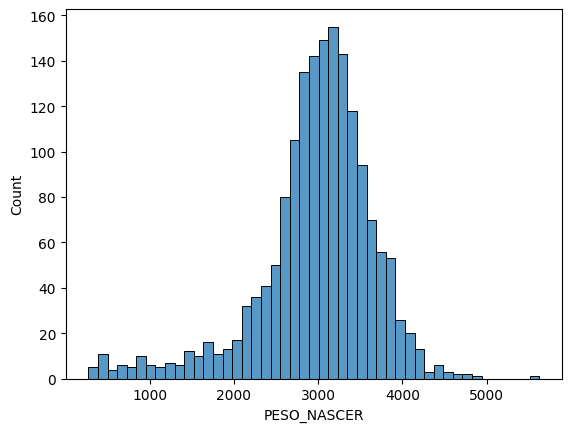

In [41]:
# sns.histplot(DADOS, VARIAVEL)
# Histograma

sns.histplot(data=dados, x='PESO_NASCER')

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

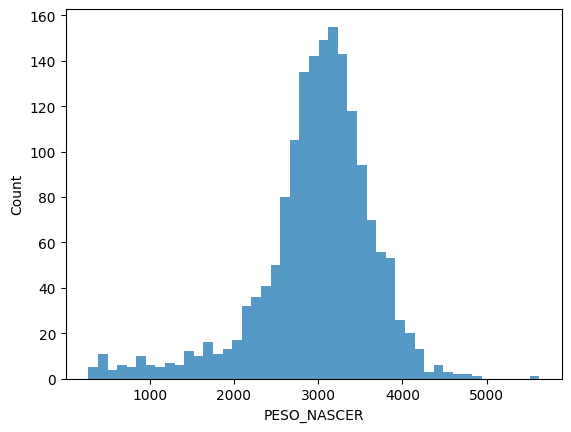

In [42]:
# Histograma - sem a linha de contorno
sns.histplot(data=dados, x='PESO_NASCER', linewidth=0)

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

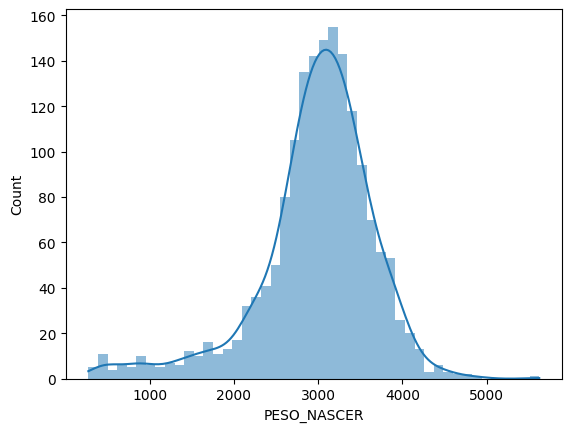

In [43]:
# Histograma - com linha de densidade
sns.histplot(data=dados, x='PESO_NASCER', linewidth=0, kde=True)

KDE (Estimativa de densidade kernel - contorno suavizado da distribuição)

"Estimativa da densidade por Kernel é um problema fundamental de suavização de dados onde inferências sobre a população são feitas com base em uma amostra de dados finita."

Saiba mais: https://pt.wikipedia.org/wiki/Estimativa_de_densidade_kernel

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

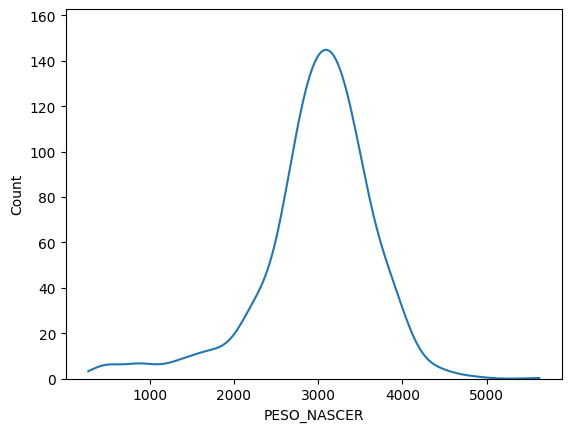

In [44]:
# Histograma - só a linha de densidade
sns.histplot(data=dados, x='PESO_NASCER', linewidth=0, kde=True, fill=False)

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

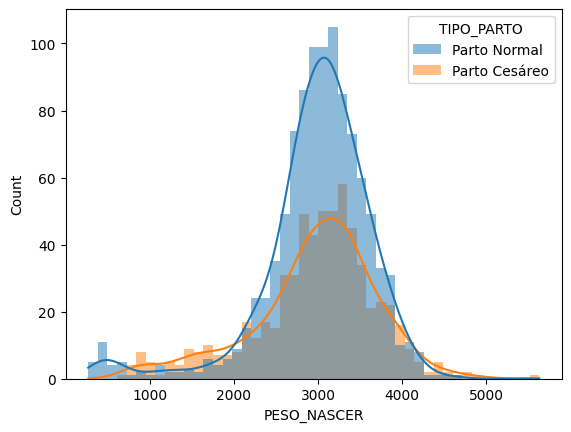

In [45]:
# Histograma - com valor y separado por uma categoria
sns.histplot(data=dados, x='PESO_NASCER', hue='TIPO_PARTO', linewidth=0, kde=True)

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

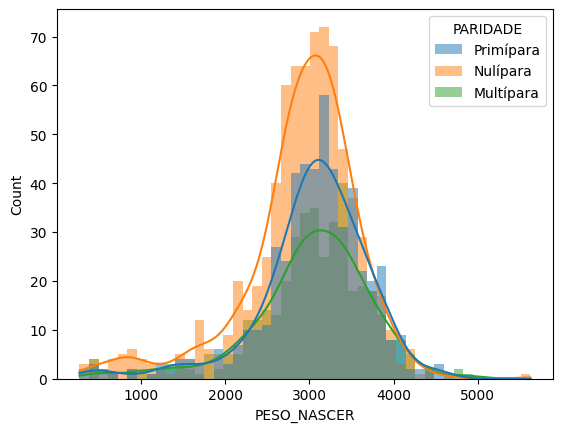

In [46]:
# Histograma - com valor y separado por uma categoria - outro exemplo
sns.histplot(data=dados, x='PESO_NASCER', hue='PARIDADE', linewidth=0, kde=True)

# Boxplot

Biblioteca Seaborn: https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

<Axes: ylabel='PESO_NASCER'>

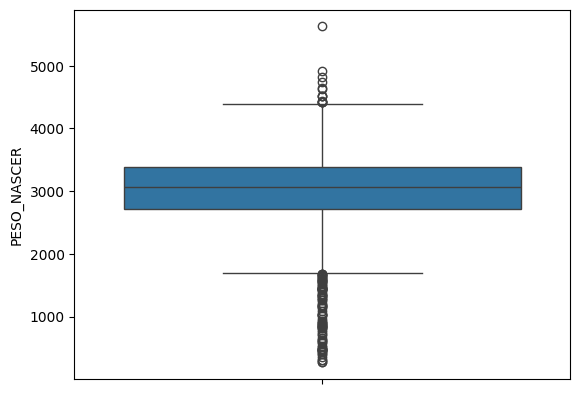

In [47]:
# Boxplot simples
sns.boxplot(data=dados, y='PESO_NASCER')

<Axes: xlabel='TIPO_PARTO', ylabel='PESO_NASCER'>

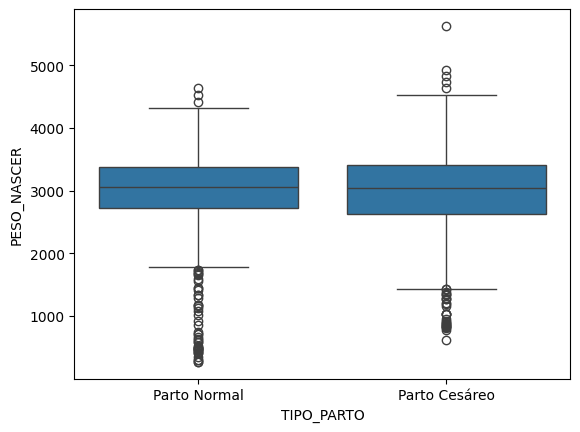

In [48]:
# sns.boxplot(DADOS, VARIAVEL_Y, VARIAVEL_X)
# Boxplot agrupado

sns.boxplot(data=dados, y='PESO_NASCER', x='TIPO_PARTO', linewidth=1)

<Axes: xlabel='TIPO_PARTO', ylabel='PESO_NASCER'>

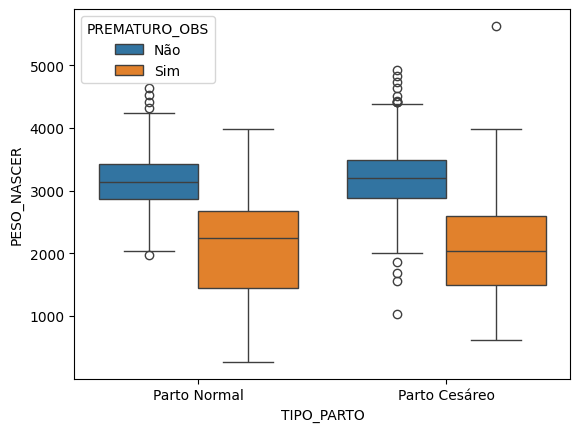

In [49]:
# Boxplot agrupado e subdivido por categoria
sns.boxplot(data=dados, y='PESO_NASCER', x='TIPO_PARTO', hue='PREMATURO_OBS', linewidth=1)

<Axes: xlabel='IG_TERMO', ylabel='PESO_NASCER'>

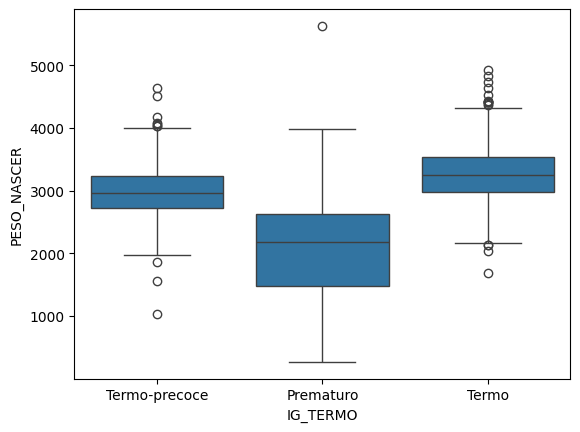

In [50]:
# Boxplot - separado em 3 categorias
sns.boxplot(data=dados, y='PESO_NASCER', x='IG_TERMO', linewidth=1)

<Axes: xlabel='IG_TERMO', ylabel='PESO_NASCER'>

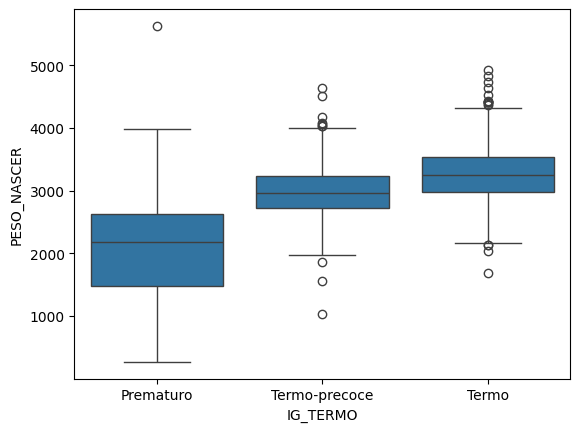

In [51]:
# Boxplot - separado em 3 categorias - definindo ordem
ordem = ['Prematuro', 'Termo-precoce', 'Termo']

sns.boxplot(data=dados, y='PESO_NASCER', x='IG_TERMO', linewidth=1, order=ordem)

# Multiplos gráficos em uma figura

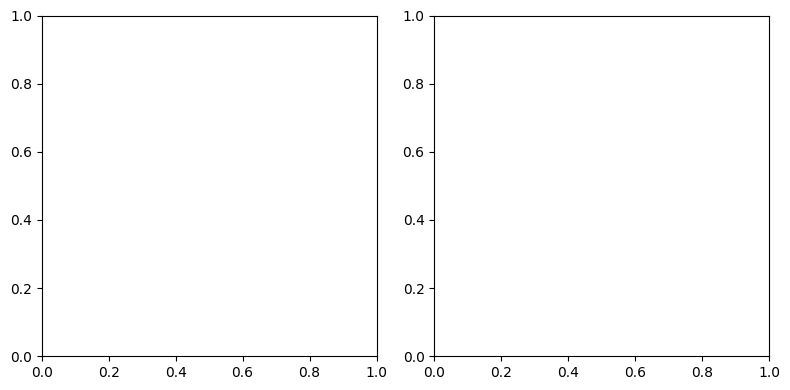

In [73]:
# Mostrar vários gráficos em uma única figura - Exemplo 2 gráficos em 1 figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

#ajusta o layout
plt.tight_layout()
# para salvar/preparar a figura (depois baixar)
plt.savefig('Figura1.png', format='png', dpi=300)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

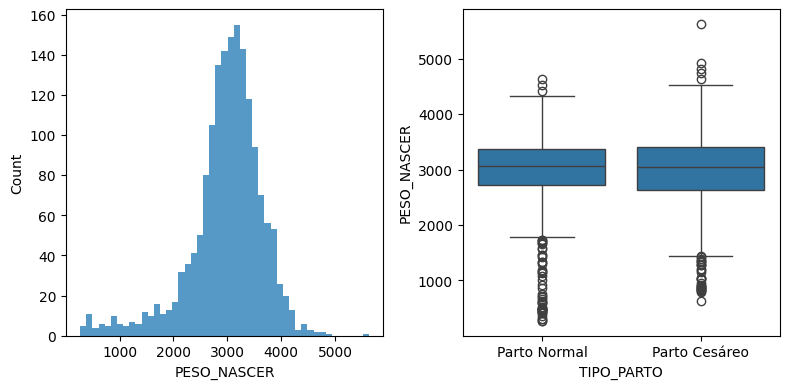

In [53]:
# Mostrar vários gráficos em uma única figura - Exemplo 2 gráficos em 1 figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# histograma
sns.histplot(dados.PESO_NASCER, linewidth=0, ax=ax1)

# Boxplot
sns.boxplot(data=dados, y='PESO_NASCER', x='TIPO_PARTO', linewidth=1, ax=ax2)

#ajusta o layout
plt.tight_layout()
# para salvar/preparar a figura (depois baixar)
nome_arquivo = 'Figura2.jpg'
plt.savefig(nome_arquivo, format='jpg', dpi=300)
files.download(nome_arquivo)

Saiba mais: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html

# Distribuição Normal e Teste de normalidade

**Saiba mais:**

Artigo de *Hélio Miot, 2017*:
**"Avaliação da normalidade dos dados em estudos clínicos e experimentais"**

Leia: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5915855/

**Relembrando**


*   H0: a distribuição é normal
*   H1: a distribuição não é normal
*   p-value: 0,05, assim:
**  se p-value < 0,05, rejeita-se H0 (conclui-se que a distribuição não é normal)
**  se p-value >= 0,05, aceita-se H0 (conclui-se que a distribuição é normal)



<Axes: xlabel='PESO_NASCER', ylabel='Count'>

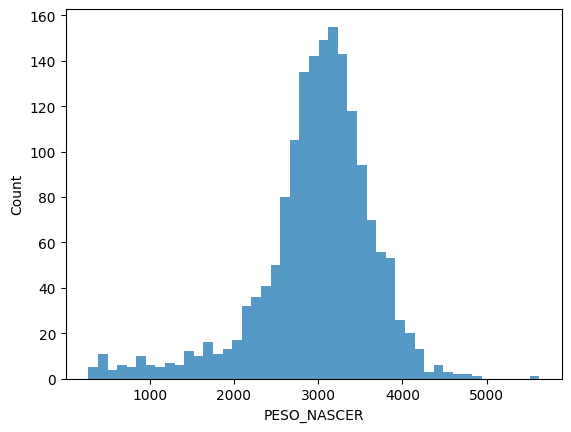

In [54]:
# Será que o PESO_NASCER é uma distribuição normal?

# histograma
sns.histplot(dados.PESO_NASCER, linewidth=0)

**Teste de Shapiro-Wilk**

Testa se uma distribuição é semelhante à uma distribuição normal.

**Hipótese nula (H0) = A distribuição é normal**

Se o **p-value < 0,05** então rejeita a H0

In [55]:
# stats.shapiro()
# Executar o teste de Shapiro-Wilk (sem nulos)

resultado = stats.shapiro(dados.PESO_NASCER.notnull())
pvalue = resultado.pvalue
pvalue

# quando o valor for 0.0 é que o valor é muito pequeno,
# mas nos artigos e nossas comunicações científicas escrevemos assim: p-value < 0,001

4.645056395258022e-67

**Normal Test - D’Agostino e Pearson’s**

*   O Shapiro não pode ser usado por amostras com valores zero.
*   Para amostras maiores que 30.

Normal Test D’Agostino and Pearson’s: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [56]:
# stats.normaltest()
# Executar o teste de Normal Test

resultado = stats.normaltest(dados.PESO_NASCER.notnull())
pvalue = resultado.pvalue
pvalue

0.0

**Teste Kolmogorov-Smirnov**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [57]:
# stats.kstest()
# Executar o teste de Kolmogorov-Smirnov

resultado = stats.kstest(dados.PESO_NASCER.notnull(), 'norm')
pvalue = resultado.pvalue
pvalue

0.0

**Fazer um teste e interpretar automaticamente**

In [58]:
# Definir qual variável
VARIAVEL = dados.PESO_NASCER.notnull()

In [59]:
# Executar o teste de Normal Test - D’Agostino and Pearson’s

resultado = stats.normaltest(VARIAVEL)
pvalue = resultado.pvalue

print("Normal Test p-value: ", pvalue)

if pvalue < 0.05 :
    print('Rejeita H0 = A distribuição é assimétrica!')
else:
    print('Aceita H0 = A distribuição é normal!')

Normal Test p-value:  0.0
Rejeita H0 = A distribuição é assimétrica!


# Variáveis Numéricas - Análise das distribuição dos dados

**PESO_NASCER**

In [60]:
# Selecionar a variável
VARIAVEL = dados.PESO_NASCER

<ipython-input-74-15248036b744>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=VARIAVEL, ax=ax2, palette='Blues', linewidth=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

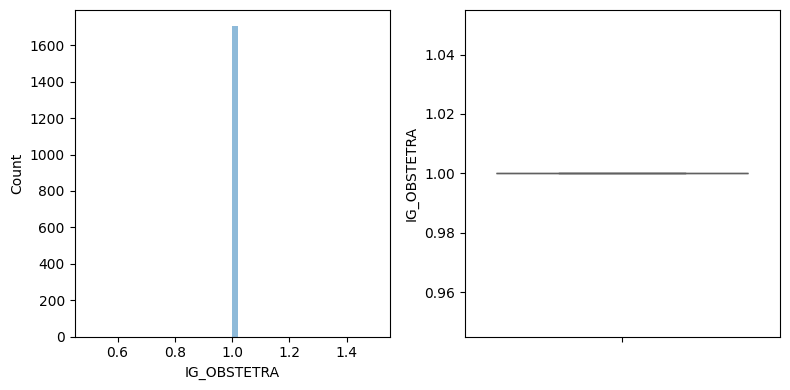

In [74]:
# Fazer os gráficos
# Criação de um figura múltipla
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# histograma
sns.histplot(VARIAVEL, ax=ax1, linewidth=0, kde=True, bins=50)

# boxplot
sns.boxplot(y=VARIAVEL, ax=ax2, palette='Blues', linewidth=1)

#ajusta o layout
plt.tight_layout()
# para salvar/preparar a figura (depois baixar)
nome_arquivo = 'FiguraAtividade_2.jpg'
plt.savefig(nome_arquivo, format='jpg', dpi=300)
files.download(nome_arquivo)

In [62]:
# Aplicar o teste estatístico de normalidade
# Remover os nulos
VARIAVEL = VARIAVEL.notnull()

# Executar o teste de Normal Test
resultado = stats.normaltest(VARIAVEL)
pvalue = resultado.pvalue

# Mostrar o p-value calculado
print("Normal Test p-value: ", pvalue)

print('Baseado no Normal Test - D’Agostino and Pearson’s')
if pvalue < 0.05 :
    print('Rejeita H0 = A distribuição é assimétrica!')
else:
    print('Aceita H0 = A distribuição é normal!')

Normal Test p-value:  0.0
Baseado no Normal Test - D’Agostino and Pearson’s
Rejeita H0 = A distribuição é assimétrica!


**DURACAO_INT**

In [63]:
# Selecionar a variável
VARIAVEL = dados.DURACAO_INT

<ipython-input-64-09557afd3344>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=VARIAVEL, ax=ax2, palette='Blues', linewidth=1)


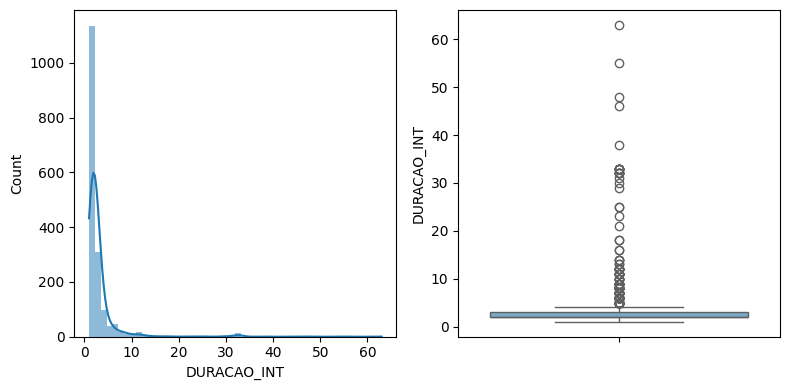

In [64]:
# Fazer os gráficos
# Criação de um figura múltipla
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# histograma
sns.histplot(VARIAVEL, ax=ax1, linewidth=0, kde=True, bins=50)

# boxplot
sns.boxplot(y=VARIAVEL, ax=ax2, palette='Blues', linewidth=1)

#ajusta o layout
plt.tight_layout()
# para salvar/preparar a figura (depois baixar)
plt.savefig('Figura3.png', format='png', dpi=300)

In [72]:
# Aplicar o teste estatístico de normalidade
# Remover os nulos
VARIAVEL = VARIAVEL.notnull()

# Executar o teste de Normal Test
resultado = stats.normaltest(VARIAVEL)
pvalue = resultado.pvalue

# Mostrar o p-value calculado
print("Normal Test p-value: ", pvalue)
print('')

print('Baseado no Normal Test')
if pvalue < 0.05 :
    print('Rejeita H0 = A distribuição é assimétrica!')
else:
    print('Aceita H0 = A distribuição é normal!')

Normal Test p-value:  nan

Baseado no Normal Test
Aceita H0 = A distribuição é normal!


**IG_OBSTETRA**

In [66]:
# Selecionar a variável
VARIAVEL = dados.IG_OBSTETRA

<ipython-input-67-438457a7a14c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=VARIAVEL, ax=ax2, palette='Blues', linewidth=1)


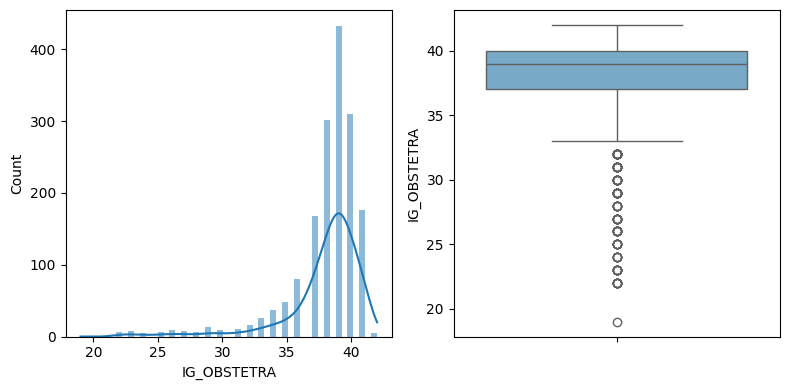

In [67]:
# Fazer os gráficos
# Criação de um figura múltipla
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# histograma
sns.histplot(VARIAVEL, ax=ax1, linewidth=0, kde=True, bins=50)

# boxplot
sns.boxplot(y=VARIAVEL, ax=ax2, palette='Blues', linewidth=1)

#ajusta o layout
plt.tight_layout()
# para salvar/preparar a figura (depois baixar)
plt.savefig('Figura4.png', format='png', dpi=300)

In [71]:
# Aplicar o teste estatístico de normalidade
# Remover os nulos
VARIAVEL = VARIAVEL.notnull()

# Executar o teste de Normal Test
resultado = stats.normaltest(VARIAVEL)
pvalue = resultado.pvalue

# Mostrar o p-value calculado
print("Normal Test p-value: ", pvalue)
print('')

print('Baseado no Normal Test')
if pvalue < 0.05 :
    print('Rejeita H0 = A distribuição é assimétrica!')
else:
    print('Aceita H0 = A distribuição é normal!')

Normal Test p-value:  nan

Baseado no Normal Test
Aceita H0 = A distribuição é normal!


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1580: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1776: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


# Q-Q Plot - Gráfico Quantil-Quantil

Avalia a distribuição de probabilidade de dados em relação a um tipo de distribuição (por exemplo distribuição normal)

Saiba mais: https://pt.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q

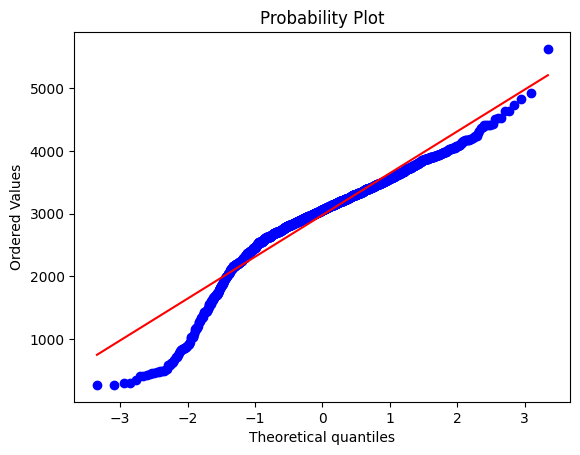

In [69]:
# Geração de gráfico Q-Q Plot - Análise de resíduos

peso_nascer_sem_nulos = dados['PESO_NASCER'].dropna()

# Criar uma figura
fig, ax = plt.subplots()

# Usa a biblioteca para criar as probabilidades e mostrar no gráfico
stats.probplot(peso_nascer_sem_nulos, fit=True, plot=ax)

plt.show()

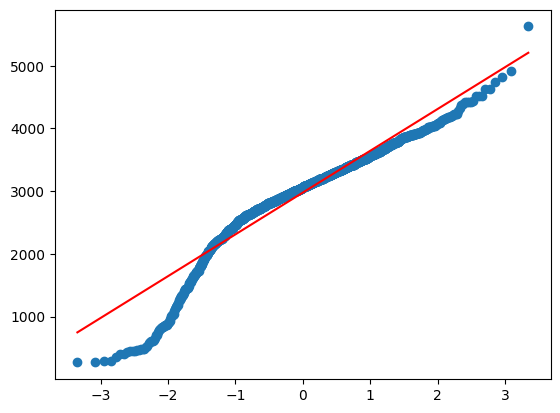

In [70]:
# Calculando a análise de resíduos a mão e mostrando em um gráfico simples

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

peso_nascer_sem_nulos = dados['PESO_NASCER'].dropna()

# Calculate theoretical quantiles
osm, osr = stats.probplot(peso_nascer_sem_nulos, fit=False)

# Calculate the line parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(osm, osr)

# calculate line parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(osm,osr)

# generate values for the reference line
fit_line = slope * osm + intercept

# plot data and reference line
plt.plot(osm, osr, 'o')
plt.plot(osm, fit_line, color='r')
plt.show()